# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе.

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [3]:
data = pd.read_csv(
    "/content/drive/MyDrive/Skillfactory/Math_ML/data/data.csv",
    encoding="ISO-8859-1",
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.

In [ ]:
# Для числовыйх признаков
data.describe(include=np.number)

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


Выводы по числовым признакам:
* Количество каждого товара за транзакцию в среднем 9.55, минимум -80995, максимум 80995.
* Цена за единицу товара в фунтах стерлингов в среднем 4.6, минимум -11062.06, максимум 38970.

In [ ]:
# Для категориальных признаков
data.describe(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
count,541909,541909,540455,541909,406829,541909
unique,25900,4070,4223,23260,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,17841,United Kingdom
freq,1114,2313,2369,1114,7983,495478


Выводы по категориальным признакам:
* Уникальных номеров счёт-фактур 25900, самый частый номер 573585.
* Уникальных кодов товара 4070, самый частый код 85123A.
* Уникальных названий товара 4223, самое частое название "WHITE HANGING HEART T-LIGHT HOLDER".
* Уникальных даты и времени проведения транзакции 23260, самая частая дата и время 10/31/2011 14:41.
* Уникальных идентификаторов клиента 4372, самый частый ID 17841.
* Уникальных стран 38, самая частая United Kingdom.

Узнайте, из каких стран совершались транзакции.

In [ ]:
data['Country'].value_counts()

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


Больше всего покупок совершалось из Великобритании, Германии и Франции.

Исследуйте данные на наличие пропусков и дубликатов.

In [ ]:
# Наличие пропусков по каждому столбцу
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Наличие дубликатов по каждому столбцу
data[data.duplicated()].count()

,0
InvoiceNo,5268
StockCode,5268
Description,5268
Quantity,5268
InvoiceDate,5268
UnitPrice,5268
CustomerID,5225
Country,5268


Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [ ]:
# Удаление строк с пропусками только в столбце 'CustomerID'
data_cleaned = data.dropna(subset=['CustomerID'])
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [ ]:
# Удаление дубликатов по всем столбцам
data_unique = data_cleaned.drop_duplicates()
data_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [ ]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [ ]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов.
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) &
                       (data['InvoiceDate'] < col['InvoiceDate']) &
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0):
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled
        elif (df_test.shape[0] == 1):
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1):
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']:
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break
    return quantity_canceled

data_unique['QuantityCanceled'] = get_quantity_canceled(data_unique)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [ ]:
data_unique['QuantityCanceled'].isna().sum()

np.int64(1303)

In [ ]:
# Удаление строк с пропусками только в столбце 'QuantityCanceled'
data_unique = data_unique.dropna(subset=['QuantityCanceled'])
data_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400301 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         400301 non-null  object        
 1   StockCode         400301 non-null  object        
 2   Description       400301 non-null  object        
 3   Quantity          400301 non-null  int64         
 4   InvoiceDate       400301 non-null  datetime64[ns]
 5   UnitPrice         400301 non-null  float64       
 6   CustomerID        400301 non-null  object        
 7   Country           400301 non-null  object        
 8   QuantityCanceled  400301 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.5+ MB


In [ ]:
# Удаление строк с отрицательным значением в столбце 'Quantity'
data_filtered = data_unique[data_unique['Quantity'] >= 0]
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         392732 non-null  object        
 1   StockCode         392732 non-null  object        
 2   Description       392732 non-null  object        
 3   Quantity          392732 non-null  int64         
 4   InvoiceDate       392732 non-null  datetime64[ns]
 5   UnitPrice         392732 non-null  float64       
 6   CustomerID        392732 non-null  object        
 7   Country           392732 non-null  object        
 8   QuantityCanceled  392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.0+ MB


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [ ]:
import re
# Удаляем специальные транзакции
df_clean = data_filtered[~data_filtered['StockCode'].str.match(r'^[a-zA-Z]+\d*')]
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0.0


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [ ]:
df_clean = df_clean[df_clean['UnitPrice'] != 0]

#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:

 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [ ]:
df_clean['TotalPrice'] = df_clean['UnitPrice'] * (df_clean['Quantity'] - df_clean['QuantityCanceled'])
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0.0,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0.0,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0.0,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0.0,16.60


Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


In [ ]:
# Сохраняем данные в отдельный файл
df_clean.to_csv('/content/drive/MyDrive/Skillfactory/Math_ML/data/cleaned_data.csv', index=False)

### 2.2. Разведывательный анализ

In [ ]:
# Загружаем датасет
df_clean = pd.read_csv("/content/drive/MyDrive/Skillfactory/Math_ML/data/cleaned_data.csv")
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
...,...,...,...,...,...,...,...,...,...,...
391145,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0.0,10.20
391146,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0.0,12.60
391147,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0.0,16.60
391148,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0.0,16.60


После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)?

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



#### Клиенты из каких стран покупают больше и чаще?

In [ ]:
# Частота покупок по странам
df_clean.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False).iloc[:3]

,InvoiceNo
Country,
United Kingdom,348872
Germany,8643
France,8019


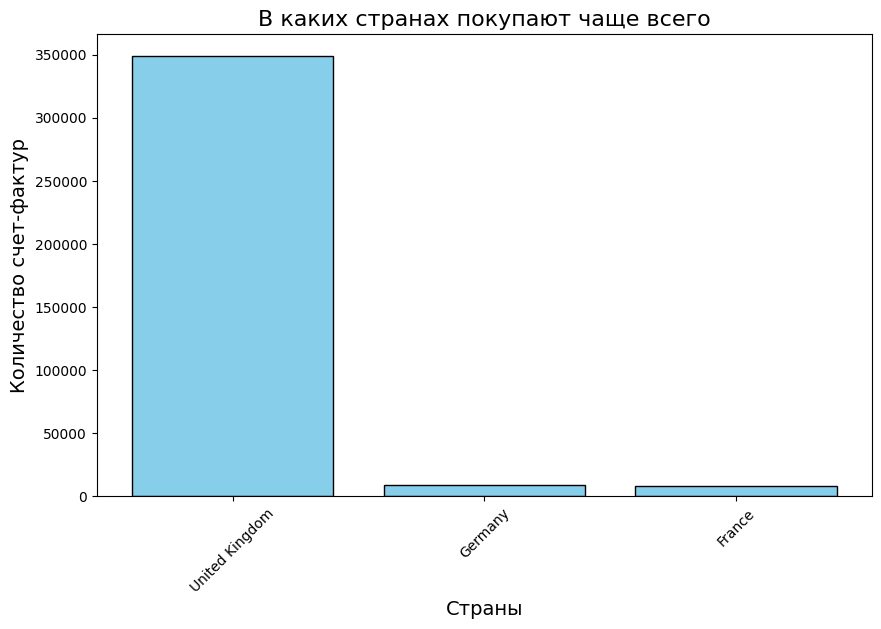

In [ ]:
# Заданные списки
countries = list(df_clean.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False).iloc[:3].index)
values = list(df_clean.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False).iloc[:3].values)

# Создание списка меток и значений для диаграммы
x_axis = np.arange(len(countries))  # Создаем ось X
y_axis = values  # Значения для отображения

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))  # Устанавливаем размер фигуры
plt.bar(x_axis, y_axis, color='skyblue',
        edgecolor='black', width=0.8, align='center')

# Настройка графика
plt.xlabel('Страны', fontsize=14)
plt.ylabel('Количество счет-фактур', fontsize=14)
plt.title('В каких странах покупают чаще всего', fontsize=16)
plt.xticks(x_axis, countries, rotation=45)  # Поворот меток оси X для удобства чтения

# Показать график
plt.show()

In [ ]:
# Сумма покупок по странам
df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3]

,TotalPrice
Country,
United Kingdom,6797691.44
Netherlands,283443.54
EIRE,247074.57


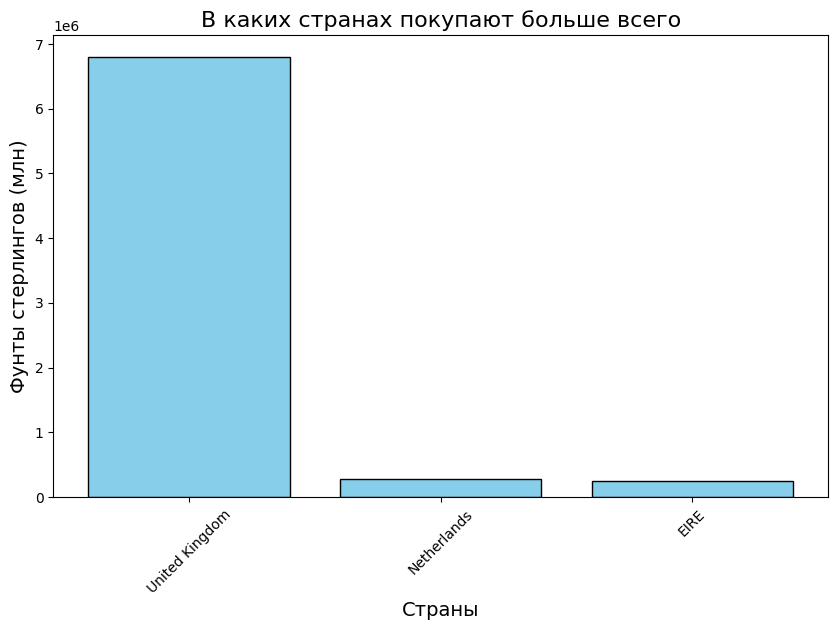

In [ ]:
# Заданные списки
countries = list(df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3].index)
values = list(df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3].values)

# Создание списка меток и значений для диаграммы
x_axis = np.arange(len(countries))  # Создаем ось X
y_axis = values  # Значения для отображения

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))  # Устанавливаем размер фигуры
plt.bar(x_axis, y_axis, color='skyblue',
        edgecolor='black', width=0.8, align='center')

# Настройка графика
plt.xlabel('Страны', fontsize=14)
plt.ylabel('Фунты стерлингов (млн)', fontsize=14)
plt.title('В каких странах покупают больше всего', fontsize=16)
plt.xticks(x_axis, countries, rotation=45)  # Поворот меток оси X для удобства чтения

# Показать график
plt.show()

Больше всего покупают в Великобритании, Нидерландах и Ирландии.

Чаще всего покупают в Великобритании, Германии и Франции.

#### Какие страны приносят наибольшую сезонную выручку?

In [ ]:
# Создаем столбец с месяцами
df_clean['Month'] = df_clean['InvoiceDate'].dt.month

# Создаем функцию для определения сезона по номеру месяца
def make_seasons(month):
  if month in [3,4,5]:
    return 'spring'
  elif month in [6,7,8]:
    return 'summer'
  elif month in [9,10,11]:
    return 'autumn'
  else:
    return 'winter'

# Создаем столбец с сезонами
df_clean['Season'] = df_clean['Month'].apply(make_seasons)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,12
...,...,...,...,...,...,...,...,...,...,...,...
391145,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0.0,10.20,12
391146,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0.0,12.60,12
391147,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0.0,16.60,12
391148,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0.0,16.60,12


Определим, какие страны приносят наибольшую выручку для каждго сезона.

In [ ]:
# Сумма покупок по странам зимой
df_clean[df_clean['Season'] == 'winter'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3]

,TotalPrice
Country,
United Kingdom,1470343.14
Netherlands,69875.77
EIRE,43497.25


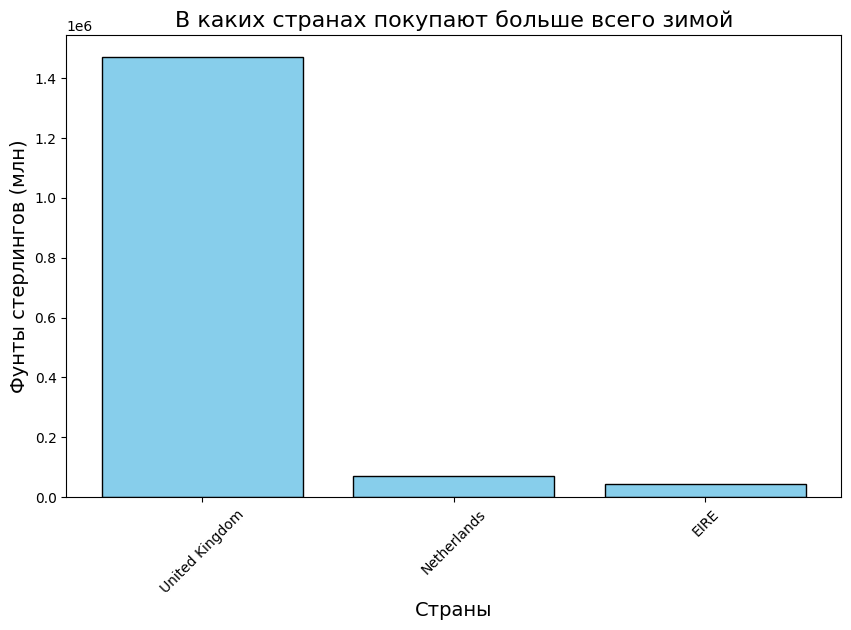

In [ ]:
# Заданные списки
countries = list(df_clean[df_clean['Season'] == 'winter'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3].index)
values = list(df_clean[df_clean['Season'] == 'winter'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3].values)

# Создание списка меток и значений для диаграммы
x_axis = np.arange(len(countries))  # Создаем ось X
y_axis = values  # Значения для отображения

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))  # Устанавливаем размер фигуры
plt.bar(x_axis, y_axis, color='skyblue',
        edgecolor='black', width=0.8, align='center')

# Настройка графика
plt.xlabel('Страны', fontsize=14)
plt.ylabel('Фунты стерлингов (млн)', fontsize=14)
plt.title('В каких странах покупают больше всего зимой', fontsize=16)
plt.xticks(x_axis, countries, rotation=45)  # Поворот меток оси X для удобства чтения

# Показать график
plt.show()

In [ ]:
# Сумма покупок по странам весной
df_clean[df_clean['Season'] == 'spring'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3]

,TotalPrice
Country,
United Kingdom,1385410.29
Netherlands,54035.93
Germany,46782.97


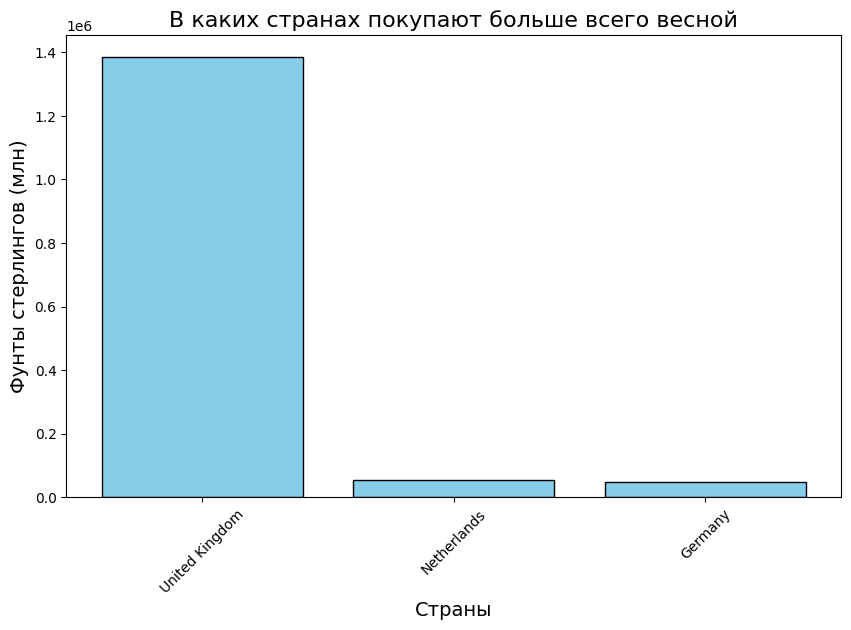

In [ ]:
# Заданные списки
countries = list(df_clean[df_clean['Season'] == 'spring'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3].index)
values = list(df_clean[df_clean['Season'] == 'spring'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3].values)

# Создание списка меток и значений для диаграммы
x_axis = np.arange(len(countries))  # Создаем ось X
y_axis = values  # Значения для отображения

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))  # Устанавливаем размер фигуры
plt.bar(x_axis, y_axis, color='skyblue',
        edgecolor='black', width=0.8, align='center')

# Настройка графика
plt.xlabel('Страны', fontsize=14)
plt.ylabel('Фунты стерлингов (млн)', fontsize=14)
plt.title('В каких странах покупают больше всего весной', fontsize=16)
plt.xticks(x_axis, countries, rotation=45)  # Поворот меток оси X для удобства чтения

# Показать график
plt.show()

In [ ]:
# Сумма покупок по странам летом
df_clean[df_clean['Season'] == 'summer'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3]

,TotalPrice
Country,
United Kingdom,1424076.83
EIRE,71846.13
Netherlands,66680.92


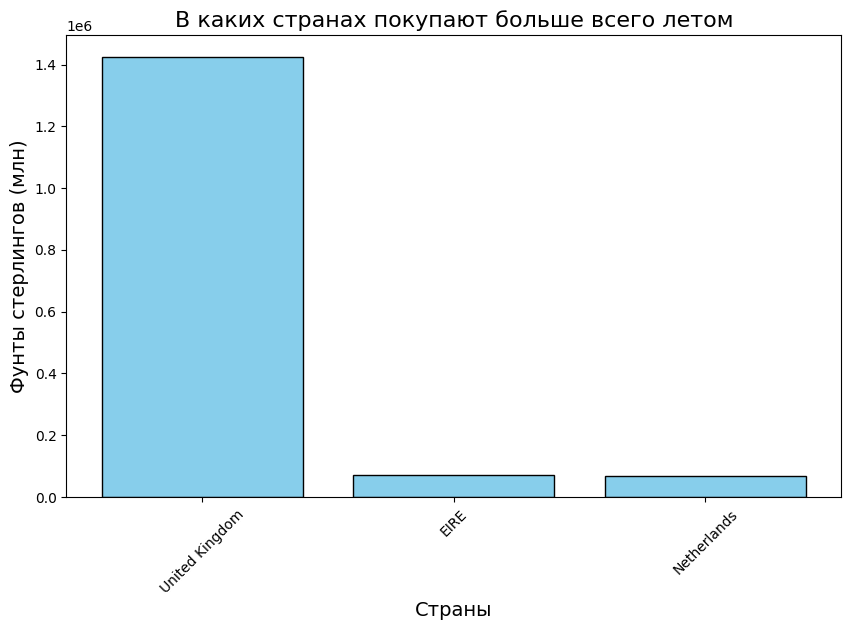

In [ ]:
# Заданные списки
countries = list(df_clean[df_clean['Season'] == 'summer'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3].index)
values = list(df_clean[df_clean['Season'] == 'summer'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3].values)

# Создание списка меток и значений для диаграммы
x_axis = np.arange(len(countries))  # Создаем ось X
y_axis = values  # Значения для отображения

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))  # Устанавливаем размер фигуры
plt.bar(x_axis, y_axis, color='skyblue',
        edgecolor='black', width=0.8, align='center')

# Настройка графика
plt.xlabel('Страны', fontsize=14)
plt.ylabel('Фунты стерлингов (млн)', fontsize=14)
plt.title('В каких странах покупают больше всего летом', fontsize=16)
plt.xticks(x_axis, countries, rotation=45)  # Поворот меток оси X для удобства чтения

# Показать график
plt.show()

In [ ]:
# Сумма покупок по странам осенью
df_clean[df_clean['Season'] == 'autumn'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3]

,TotalPrice
Country,
United Kingdom,2517861.18
Netherlands,92850.92
EIRE,91008.17


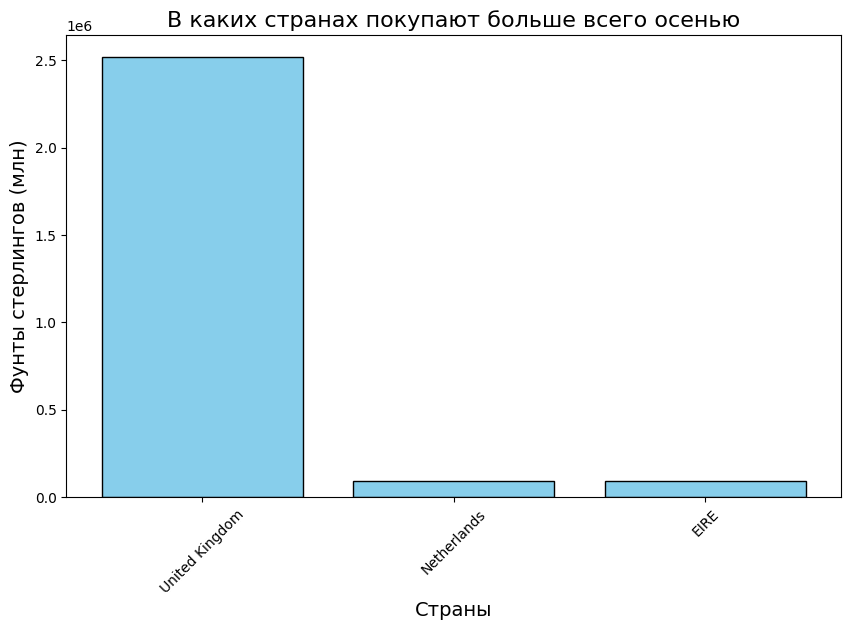

In [ ]:
# Заданные списки
countries = list(df_clean[df_clean['Season'] == 'autumn'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3].index)
values = list(df_clean[df_clean['Season'] == 'autumn'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).iloc[:3].values)

# Создание списка меток и значений для диаграммы
x_axis = np.arange(len(countries))  # Создаем ось X
y_axis = values  # Значения для отображения

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))  # Устанавливаем размер фигуры
plt.bar(x_axis, y_axis, color='skyblue',
        edgecolor='black', width=0.8, align='center')

# Настройка графика
plt.xlabel('Страны', fontsize=14)
plt.ylabel('Фунты стерлингов (млн)', fontsize=14)
plt.title('В каких странах покупают больше всего осенью', fontsize=16)
plt.xticks(x_axis, countries, rotation=45)  # Поворот меток оси X для удобства чтения

# Показать график
plt.show()

Если оценивать выручку по сезонам, то получаются следующие результаты:
* Зимой больше всего приносят страны Великобритания, Нидерланды и Ирландия.
* Весной больше всего приносят страны Великобритания, Нидерланды и Германия.
* Летом больше всего приносят страны Великобритания, Ирландия и Нидерланды.
* Весной больше всего приносят страны Великобритания, Нидерланды и Ирландия.

#### Присутствует ли в продажах сезонность (когда покупают чаще)?

In [ ]:
df_clean['Season'].value_counts()

,count
Season,
autumn,151059
winter,83059
summer,79977
spring,77055


Сезонность присутствует, чаще всего пукупают осенью.

#### Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.


In [ ]:
# Создаем признаки дата покупки и час покупки
df_clean['date'] = df_clean['InvoiceDate'].dt.date
df_clean['hour'] = df_clean['InvoiceDate'].dt.hour

In [ ]:
# Группируем заказы по датам и часам
amount_of_orders_per_day_and_hour = df_clean.groupby(['date', 'hour'])['InvoiceNo'].count()

In [ ]:
# Вычисление среднего количества заказов в каждый час
amount_of_orders_per_day_and_hour.groupby('hour').mean()

,InvoiceNo
hour,
6,1.000000
7,16.304348
8,42.274510
9,86.456349
10,123.953795
11,158.582237
12,231.855738
13,207.947020
14,176.252492


Больше всего заказов в среднем совершается в 12 часов.

#### Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)?

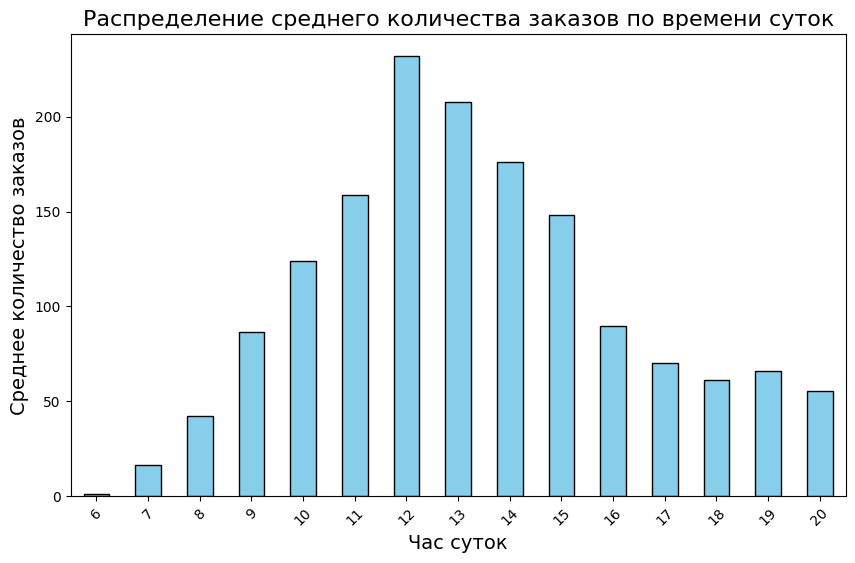

In [ ]:
# Визуализация результатов
plt.figure(figsize=(10, 6))
amount_of_orders_per_day_and_hour.groupby('hour').mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Час суток', fontsize=14)
plt.ylabel('Среднее количество заказов', fontsize=14)
plt.title('Распределение среднего количества заказов по времени суток', fontsize=16)
plt.xticks(rotation=45)
plt.show()

Из графика следует, что в период с 20 до 5 часов транзакций нет совсем, пик платежной активности приходится на 12 часов. Распределение близкко к нормальному.

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM.

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов.

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [5]:
# Создаем dataframe для наших признаков
rfm_df = pd.DataFrame(data=None, columns=['Recency', 'Frequency', 'Monetary_Value'])

In [ ]:
from datetime import datetime
# Группируем по клиентам и считаем Recency
rfm_df['Recency'] = datetime(2011, 12, 10) - df_clean.groupby(['CustomerID'])['InvoiceDate'].max()
# Переводим Timedelta в дни
recency_list = []
for i in rfm_df['Recency'].iloc[:]:
  temp = i.days + i.seconds/(60 * 60 * 24)
  recency_list.append(temp)

rfm_df['Recency'] = recency_list

rfm_df

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346,325.582639,NaN,NaN
12347,2.338889,NaN,NaN
12348,75.449306,NaN,NaN
12349,18.589583,NaN,NaN
12350,310.332639,NaN,NaN
...,...,...,...
18280,277.588889,NaN,NaN
18281,180.546528,NaN,NaN
18282,7.511806,NaN,NaN


In [ ]:
# Группируем по клиентам и считаем Frequency
rfm_df['Frequency'] = df_clean.groupby(['CustomerID'])['InvoiceDate'].nunique()
rfm_df

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346,325.582639,1,NaN
12347,2.338889,7,NaN
12348,75.449306,4,NaN
12349,18.589583,1,NaN
12350,310.332639,1,NaN
...,...,...,...
18280,277.588889,1,NaN
18281,180.546528,1,NaN
18282,7.511806,2,NaN


In [ ]:
# Группируем по клиентам и считаем Monetary_Value
rfm_df['Monetary_Value'] = df_clean.groupby(['CustomerID'])['TotalPrice'].sum()
rfm_df

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346,325.582639,1,0.00
12347,2.338889,7,4310.00
12348,75.449306,4,1437.24
12349,18.589583,1,1457.55
12350,310.332639,1,294.40
...,...,...,...
18280,277.588889,1,180.60
18281,180.546528,1,80.82
18282,7.511806,2,176.60


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [ ]:
boxes = [px.box(rfm_df, x=column) for column in rfm_df.columns]
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [ ]:
# Напишем функцию, которая удаляет данные выше квантиля уровня 0.95
def outliers_95(data, feature):
    x = data[feature]
    quartile_95 = x.quantile(0.95)
    outliers = data[(x > quartile_95)]
    cleaned = data[(x <= quartile_95)]
    return outliers, cleaned

In [ ]:
outliers, cleaned = outliers_95(rfm_df, 'Monetary_Value')
print(f'Число выбросов : {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов : 217
Результирующее число записей: 4117


Посмотрим, какое теперь распределение

In [ ]:
boxes = [px.box(cleaned, x=column) for column in cleaned.columns]
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга).

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([('scaler', StandardScaler())])

# Преобразование данных
X_transformed = pipeline.fit_transform(cleaned)

In [ ]:
X_transformed.shape

(4117, 3)

Проведем класстеризацию с помощью методов k-means, EM-алгоритм и агломеративной класстеризации.

0.4868614300711307


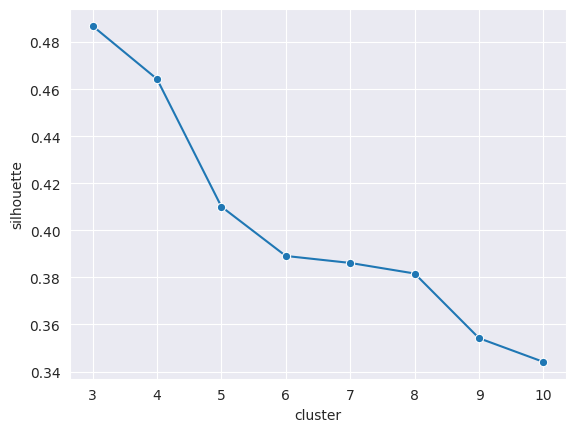

In [ ]:
# k-mean
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score
from sklearn import cluster

# напишем функцию для подсчета коэфициента
def get_silhouette(cluster_num, X):
    k_means =  cluster.KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные
X = X_transformed

for cluster_num in range(3, 11):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")
print(max((silhouette_res["silhouette"])))

0.22184358080693253


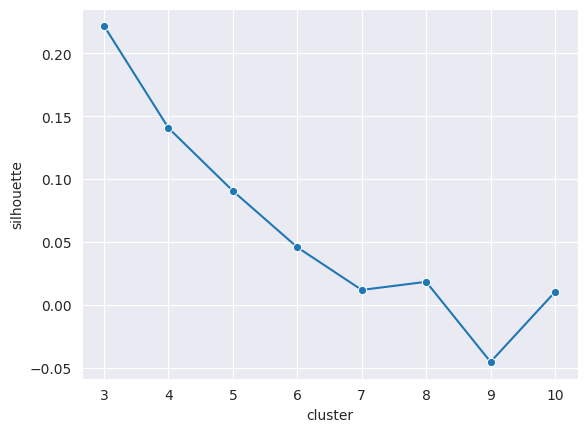

In [ ]:
# EM-алгоритм
from sklearn.mixture import GaussianMixture

# напишем функцию для подсчета коэфициенталоктя
def get_silhouette(cluster_num, X):
    gm_clustering = GaussianMixture(n_components=cluster_num, random_state=42)
    gm_clustering.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, gm_clustering.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные
X = X_transformed

for cluster_num in range(3, 11):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")
print(max((silhouette_res["silhouette"])))

0.4215088746646394


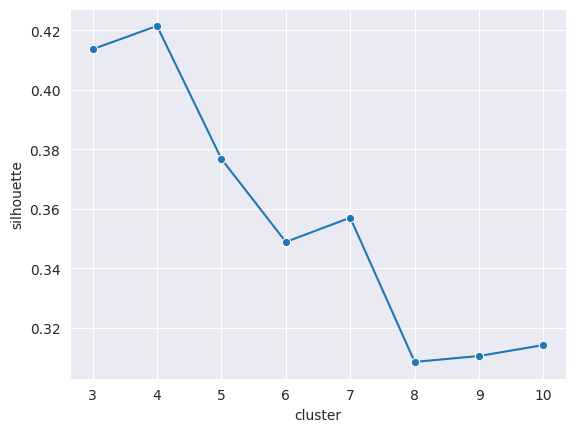

In [ ]:
# агломеративная иерархическая кластеризация
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering
# напишем функцию, которая будет проводить алгомеративную кластеризацию
# на вход она будет принимать X — матрицу с признаками для кластеризации и n_clusters — количество кластеров,
# на выходе будет возвращать список с номерами кластеров
def get_aggl_clustering(X, n_clusters):
    # запустим агломеративную кластеризацию
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    # обучим модель агломеративной кластеризации
    agglomerative_clustering.fit(X)
    # получим список c информацией, к какому кластеру относятся объекты
    aggl_prediction = agglomerative_clustering.labels_
    # вернём список с результатами
    return aggl_prediction


# напишем функцию для подсчёта коэффициента силуэта
def get_silhouette_agg_clust(X, cluster_num):
    # проведём агломеративную кластеризацию с заданным количеством кластеров
    res = get_aggl_clustering(X, cluster_num)
    # рассчитаем коэффициент силуэта
    silhouette = silhouette_score(X, res)
    return silhouette


# создадим пустой словарь, ключами будут коэффициент силуэта и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}


for cluster_num in range(3, 11):
    silhouette_res["silhouette"].append(get_silhouette_agg_clust(X_transformed, cluster_num))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")
print(max((silhouette_res["silhouette"])))

Наилучший результат показал k-means для 3 кластеров: коэфициент силуэта = 0.49

In [ ]:
# Делаем предсказание для лучшего алгоритма
model = cluster.KMeans(n_clusters=3, random_state=42)
model.fit(X_transformed)

predictions = model.labels_

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

In [ ]:
# Интерактивная 3D визуализация с plotly
fig = go.Figure(data=[go.Scatter3d(
    x=cleaned['Recency'],
    y=cleaned['Frequency'],
    z=cleaned['Monetary_Value'],
    mode='markers',
    marker=dict(
        size=4,
        color=predictions,
        colorscale='viridis'
    )
)])

fig.update_layout(title='3D Clustering of Recency, Frequency, and Monetary',
                   scene=dict(xaxis_title='Recency', yaxis_title='Frequency', zaxis_title='Monetary'))

fig.show()

По получившимся кластерам видно, что есть три вида клиентов.
1. Давно не совершали покупок, общая сумма трат низкая и количество заказов низкое.
2. Недвано совершали покупки, но общая сумма трат низкая и количество заказов низкое.
3. Недавно совершали покупки, общая сумма трат высокая и большое количество заказов. Очевидно, это самые платежеспособные и лояльные клиенты.

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник.

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [ ]:
from sklearn import preprocessing
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [ ]:
# Создаем таблицу для функции plot_cluster_profile
plot_data = cleaned.copy()
plot_data['cluster'] = predictions
plot_data.groupby(['cluster'])[['Recency', 'Frequency', 'Monetary_Value']].mean()

,Recency,Frequency,Monetary_Value
cluster,,,
0,251.844808,1.451707,401.095649
1,49.638683,2.512083,725.124604
2,28.901819,8.618497,3012.734090


In [ ]:
plot_cluster_profile(plot_data.groupby(['cluster'])[['Recency', 'Frequency', 'Monetary_Value']].mean(), 3)

На данной схеме видно, что в кластере номер "0" клиенты совершали покупки давно, покупали редко и мало. В кластере номер "1" средние клиенты, которые покупают не очень много, не очень часто и не очень давно. В кластере номер "2" наши самые лучшие клиенты, они покупают часто, много и последний раз покупали совсем недавно.

## 4. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

### Общие выводы по проделанной работе.

Была проделана работа по сегмантации клиентав онлайн-магазина.

Работа состояла и следующий этапов:
1. Знакомство с данными.
2. Преобразование, очистка и анализ данных.
  1. Преобразование и очистка данных о транзакциях.
  2. Разведывательный анализ данных о транзакциях.
  3. Построение RFM-таблицы и поиск RFM-выбросов.
3. Моделирование и оценка качества модели.
  1. Кластеризация на основе RFM-характеристик. Перед кластеризацией производилась стандартизация данных. На основании коэфициента силуэта выбирался лучший алгоритм и оптимальное количество кластеров. Выбор осуществлялся между k-means, EM-алгоритмом и агломеративной класстеризацией. В итоге, лучшие результаты показал k-means для 3 кластеров: коэфициент силуэта = 0.49.
  2. Интерпретация кластеров. Производилась 3-d визуализация, на основании которой стало понятно, на какие группы разбились клиенты. По получившимся кластерам видно, что есть три вида клиентов:
    1. Давно не совершали покупок, общая сумма трат низкая и количество заказов низкое.
    2. Недвано совершали покупки, но общая сумма трат низкая и количество заказов низкое.
    3. Недавно совершали покупки, общая сумма трат высокая и большое количество заказов. Очевидно, это самые платежеспособные и лояльные клиенты.

  